In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-product-reviews/Reviews.csv
/kaggle/input/df1-dataset/lstm_model.json
/kaggle/input/df1-dataset/tokenizer.pickle
/kaggle/input/df1-dataset/lstm_model .json
/kaggle/input/df1-dataset/current_feedback1.csv
/kaggle/input/df1-dataset/lstm_model.h5
/kaggle/input/df1-dataset/current_feedback2.csv
/kaggle/input/df1-dataset/lstm_model.weights.h5
/kaggle/input/df1-dataset/df1.csv
/kaggle/input/df1-dataset/train.csv
/kaggle/input/df1-dataset/test.csv


### Installing the Tools

In [2]:
!pip install mlflow
!pip install evidently


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.4/28.4 MB 66.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 82.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 672.8/672.8 kB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.9/109.9 kB 2.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 36.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.2/236.2 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 kB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━

## Neccessary Labraries and Tools

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pickle

# NLP Libraries
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer,PorterStemmer


# ML Libraries & Evaluation matrics
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree


# MLflow
import mlflow
from mlflow.models import infer_signature
import mlflow.sklearn
from urllib.parse import urlparse


# Deep Learning Models
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras import regularizers
from tensorflow.keras.models import model_from_json


# Evidently for Model Monitoring - Model Drift
import evidently
from evidently.report import Report
from evidently.metrics import DatasetDriftMetric
from evidently.report import Report
from evidently.metrics import ClassificationQualityMetric



# 1. Collect the Cleaned Dataset 

- Balanced 
- no Duplicate 
- no missing values
- Removed stop words
- Convert words into Base Form (Lemmetization , Stemming) 
- Removed Punctuations

In [ ]:
### This is Preprocessed dataset
df2=pd.read_csv('/kaggle/input/df1-dataset/df1.csv')

In [7]:
df2['Sentiment'].value_counts()

Sentiment
Neutral     20900
Negative    20900
Positive    20900
Name: count, dtype: int64

In [8]:
df2.head()

Unnamed: 0                                               Text Sentiment  \
0           0  Ok here we go again, another reviewer who says...   Neutral   
1           1  I wanted the reduced fat bisquick but was give...   Neutral   
2           2  Bassettss is commonly regarded as THE premium ...   Neutral   
3           3  I ordered these to have at my son's Harry Pott...   Neutral   
4           4  That's pretty much what these ramen noodles ha...   Neutral   

                                        cleaned_text  
0  ok go anoth review say bad high fructos corn s...  
1  want reduc fat bisquick given heart healthi in...  
2  bassettss commonli regard premium brand all-so...  
3  order son 's harri potter birthday parti kid f...  
4  's pretti much ramen noodl spici love spici no...

In [55]:
df2.iloc[62699]['Text']

"Just as I expected!  Super fast shipping, great packaging.  With 3 young boys, I can't keep enough peanut butter in the house!  Perfect!"

## Converting Categorical target variable into numerical

In [ ]:
df2['Sentiment'] = df2['Sentiment'].apply(lambda x: 0 if x=='Negative' else (1 if x == 'Neutral' else 2))



In [10]:
df2['Sentiment'].value_counts()

Sentiment
1    20900
0    20900
2    20900
Name: count, dtype: int64

In [ ]:
X=df2['cleaned_text'] #-> This is the cleaned text
y=df2['Sentiment'] #-> This is the target variable

In [12]:
set(y)

{0, 1, 2}

### 3.Vectorization and Modeling

- Setup MLflow for track model parameters and perfomance connect with local system using ngork labrary
- Amazon Product Review Sentimant Experiement

In [33]:
mlflow.set_tracking_uri("https://af07-150-129-100-21.ngrok-free.app")
mlflow.set_experiment("Amazon Product Review Sentimant Experiement")



<Experiment: artifact_location='/home/muhammed/Desktop/Amazon product review/artifacts/1', creation_time=1741196389486, experiment_id='1', last_update_time=1741196389486, lifecycle_stage='active', name='Amazon Product Review Sentimant Experiement', tags={'mlflow.sharedViewState.60b5838b3c07b10d688fd52b4dd6c37593b139dcfb12d21877e12fcb552682f6': 'deflate;eJxdUl1PwzAM/CsozxOC176VMT7EhlA3JqQJbVnirZbSpIqdsYL233HXQQePPt/5nHO+FIGOprxDxxBVptRAhWgh3jRP0EitmSOuEwNdEuvIS8YKelJORmUb7QgG6tifte1M5eOxkBxuwDTGwe/43DDuWr3VrAmYfjqL94GqggU3h0gYfK9w7qJInkRD4MAw2GFwqRIkW5yvt5qGFA2shHiOTtqh9B+97exXSmyjTB/ta+0tWJV9HTrkBb1v68WJ8YDWgu/rORKu0SE3E133so7Wmsrud4/FdLa8vloWr89T2WCH8DHRe6zwsx19yk1kYyT+MTihSLkxkrJkUcAx7TNJIriPIdVg59oloEc/LCV8iYRjkn6JFkZVzc1feNtqbuSsPjl3Kv89XScOBWwiUDnyeu3OTLcurLUbo4fj1GHwG9yKSu3zPVL3XYihPh7ew7QKgUsPJPZX/fHeWvIE5BSmk6jD4RvYX+ai'}>

In [18]:
# Split the data set into two part for training and testing 
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state = 42,test_size = 0.20)


In [78]:
test_df=pd.DataFrame(x_test)
test_df['Sentiment']=y_test

train_df=pd.DataFrame(x_train)
train_df['Sentiment']=y_train

##### Create Two set of dataset for User Feedback for Monitoring and Retraining

In [79]:
df_feedback1.to_csv("current_feedback1.csv", index=False)
df_feedback2.to_csv("current_feedback2.csv", index=False)
test_df.to_csv("test.csv",index=False)
train_df.to_csv("train.csv",index=False)
print(df_feedback1.shape)
print(df_feedback2.shape)

(940, 201)
(940, 201)


In [41]:
signature=infer_signature(X_train,y_train)


In [ ]:
voca_size=20000 
embedding_size=200  

## 4. Model Monitoring

### 1. Load Pretrained LSTM Model and its Tokenizer

-  You can see the LSTM Training on ```amazon-product-review.ipynb```

In [16]:
with open("/kaggle/input/df1-dataset/lstm_model.json", "r") as json_file:
    loaded_model_json = json_file.read()
    model = model_from_json(loaded_model_json)


model.load_weights("/kaggle/input/df1-dataset/lstm_model.weights.h5")


with open('/kaggle/input/df1-dataset/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

#### Reference Data - The Data was used during train LSTM

In [67]:
reference_data=pd.read_csv('/kaggle/input/df1-dataset/test.csv')
reference_data

0  1  2  3  4  5  6  7  8  9  ...   191   192   193   194   195   196  \
0      0  0  0  0  0  0  0  0  0  0  ...    14   161    62  4540  1302     4   
1      0  0  0  0  0  0  0  0  0  0  ...   297   252   130   553  3807    11   
2      0  0  0  0  0  0  0  0  0  0  ...  2771   236   145   251  2349   614   
3      0  0  0  0  0  0  0  0  0  0  ...     9    42    20    32    51     1   
4      0  0  0  0  0  0  0  0  0  0  ...   249    53   350     8     4  3206   
...   .. .. .. .. .. .. .. .. .. ..  ...   ...   ...   ...   ...   ...   ...   
16925  0  0  0  0  0  0  0  0  0  0  ...    15  3426  1913   244  5257   445   
16926  0  0  0  0  0  0  0  0  0  0  ...   590   292    80    19   456     1   
16927  0  0  0  0  0  0  0  0  0  0  ...   204   232   498  6715   271   891   
16928  0  0  0  0  0  0  0  0  0  0  ...    39  1856  2403   234   172   614   
16929  0  0  0  0  0  0  0  0  0  0  ...   179    68   125    43    81     1   

        197  198   199  Sentiment  
0       119  102    20          0  
1        46   96   236          2  
2      1502   39  1456          0  
3         1   57   953          0  
4       201  249    53          0  
...     ...  ...   ...        ...  
16925    53   40    21          2  
16926     1  672   797          2  
16927  1001   26    24          0  
16928    14  363  3018          0  
16929   670   32    79          0  

[16930 rows x 201 columns]

In [ ]:
ref_predicted=model.predict(reference_data.drop('Sentiment',axis=1).values)
predicted_class = [np.argmax(lis) for lis in ref_predicted]

530/530 ━━━━━━━━━━━━━━━━━━━━ 39s 73ms/step


In [70]:
set(predicted_class)

{0, 1, 2}

In [71]:
reference_data['Predicted_Sentiment']=predicted_class


#### Feedback Data 1

In [ ]:
current_feedback1=pd.read_csv('/kaggle/input/df1-dataset/current_feedback1.csv')

current1_predicted=model.predict(current_feedback1.drop('Sentiment',axis=1).values)

30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step


In [73]:
predicted_class = [np.argmax(lis) for lis in current1_predicted]
current_feedback1['Predicted_Sentiment']=predicted_class

set(predicted_class)

{0, 1, 2}

In [ ]:
# change the column name for monitor the drift using Evidently
current_feedback1 = current_feedback1.rename(columns={'Sentiment': 'target', 'Predicted_Sentiment': 'prediction'})
reference_data = reference_data.rename(columns={'Sentiment': 'target', 'Predicted_Sentiment': 'prediction'})



In [52]:

performance_report = Report(metrics=[ClassificationQualityMetric()])
performance_report.run(reference_data=reference_data, current_data=current_feedback1)
performance_report.save_html("performance_report.html")

In [53]:
from IPython.core.display import display, HTML
display(HTML("/kaggle/working/performance_report.html"))


### Re-Train Model on First Batch of Feedback

In [4]:
train_data=pd.read_csv('/kaggle/input/df1-dataset/train.csv')
new_data=pd.read_csv('/kaggle/input/df1-dataset/current_feedback1.csv')

In [5]:
full_data = pd.concat([train_data, new_data], ignore_index=True)
print(f"✅ Merged dataset size: {full_data.shape}")


✅ Merged dataset size: (44830, 201)


In [6]:
x_train=full_data.drop('Sentiment',axis=1)
y_train=full_data['Sentiment']

In [7]:
test_data=pd.read_csv('/kaggle/input/df1-dataset/test.csv')

In [8]:
x_test=test_data.drop('Sentiment',axis=1)
y_test=test_data['Sentiment']

### Load MLflow Labrary For tracking Model

In [9]:
import mlflow
from mlflow.models import infer_signature
import mlflow.sklearn
from urllib.parse import urlparse

mlflow.set_tracking_uri("https://7c95-150-129-100-182.ngrok-free.app")
mlflow.set_experiment("Amazon Product Review Sentimant Experiement")
signature=infer_signature(x_train,y_train)


/usr/local/lib/python3.10/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


In [ ]:

voca_size=20000 
embedding_size=200  
max_len = 200

In [18]:

model=Sequential()
model.add(Embedding(input_dim=voca_size,output_dim=embedding_size,input_length=max_len))
model.add(LSTM(256,recurrent_dropout=0.3,dropout=0.2))
model.add(Dropout(0.4)) 
model.add(Dense(3,activation='softmax',kernel_regularizer=regularizers.l2(0.02)))

In [ ]:
import tensorflow as tf
import mlflow
import mlflow.tensorflow
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

mlflow.tensorflow.autolog()

with mlflow.start_run(run_name="First ReTrained  LSTM"):

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=5)

    model_checkpoint = ModelCheckpoint(
        'best_model1.keras',  
        monitor='val_loss',  
        save_best_only=True, 
        mode='min',
        verbose=1  
    )

    # Train the LSTM model
    history1 = model.fit(
        x_train, y_train, 
        epochs=12, 
        batch_size=128, 
        validation_data=(x_test, y_test),
        callbacks=[early_stopping, model_checkpoint]
    )

    # Evaluate the model on the validation set
    val_loss, val_accuracy = model.evaluate(x_test, y_test, verbose=1)

    
    # Get model predictions
    y_pred_probs = model.predict(x_test)
    y_pred = tf.argmax(y_pred_probs, axis=1).numpy()

    
    # Calculate precision, recall, and F1-score
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Log validation results in MLflow
    mlflow.log_metric("val_loss", val_loss)
    mlflow.log_metric("val_accuracy", val_accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)

    # Log the best model
    mlflow.log_artifact('best_model1.keras')
    mlflow.log_artifact('lstm_model.weights.h5')
    # End MLflow run
    mlflow.end_run()


2025/03/11 17:03:00 WARNING mlflow.tensorflow: Encountered unexpected error while inferring batch size from training dataset: Sequential model 'sequential_3' has no defined input shape yet.
2025/03/11 17:03:01 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'pandas.core.frame.DataFrame'>. Dataset logging skipped.
2025/03/11 17:03:01 WARNING mlflow.tensorflow: Failed to log training dataset information to MLflow Tracking. Reason: 'DataFrame' object has no attribute 'flatten'


Epoch 1/12
351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - accuracy: 0.5316 - loss: 0.9879
Epoch 1: val_loss improved from inf to 0.76029, saving model to best_model1.keras
351/351 ━━━━━━━━━━━━━━━━━━━━ 110s 293ms/step - accuracy: 0.5318 - loss: 0.9875 - val_accuracy: 0.6702 - val_loss: 0.7603
Epoch 2/12
351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.7047 - loss: 0.7077
Epoch 2: val_loss did not improve from 0.76029
351/351 ━━━━━━━━━━━━━━━━━━━━ 102s 290ms/step - accuracy: 0.7047 - loss: 0.7077 - val_accuracy: 0.6738 - val_loss: 0.7658
Epoch 3/12
351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - accuracy: 0.7335 - loss: 0.6507
Epoch 3: val_loss did not improve from 0.76029
351/351 ━━━━━━━━━━━━━━━━━━━━ 101s 288ms/step - accuracy: 0.7334 - loss: 0.6507 - val_accuracy: 0.6662 - val_loss: 0.7664
Epoch 4/12
351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - accuracy: 0.7586 - loss: 0.6091
Epoch 4: val_loss did not improve from 0.76029
351/351 ━━━━━━━━━━━━━━━━━━━━ 101s 289ms/step - accuracy: 0.758

2025/03/11 17:13:20 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: Cannot log input example or model signature for input with type <class 'pandas.core.frame.DataFrame'>. TensorFlow Keras autologging can only log input examples and model signatures for the following input types: numpy.ndarray, dict[string -> numpy.ndarray], tensorflow.keras.utils.Sequence, and tensorflow.data.Dataset (TensorFlow >= 2.1.0 required)
2025/03/11 17:13:20 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2025/03/11 17:13:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


530/530 ━━━━━━━━━━━━━━━━━━━━ 39s 73ms/step - accuracy: 0.6511 - loss: 0.8484
530/530 ━━━━━━━━━━━━━━━━━━━━ 39s 73ms/step
🏃 View run First ReTrained  LSTM at: https://7c95-150-129-100-182.ngrok-free.app/#/experiments/1/runs/0c03434e42874d78b2dfbf662bc4f0a0
🧪 View experiment at: https://7c95-150-129-100-182.ngrok-free.app/#/experiments/1


NameError: name 'precision_score' is not defined

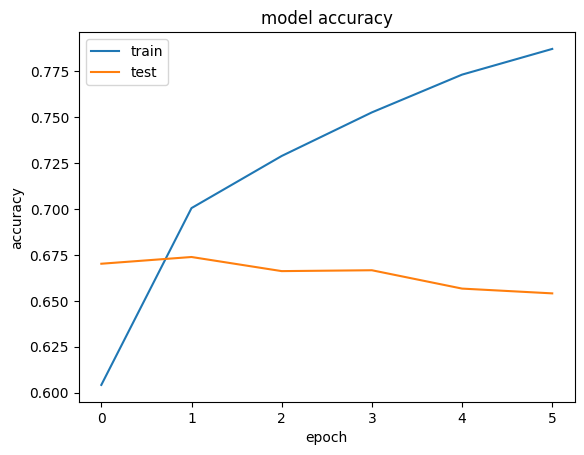

In [22]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
y_pred=model.predict(x_test)

530/530 ━━━━━━━━━━━━━━━━━━━━ 38s 72ms/step


<Axes: >

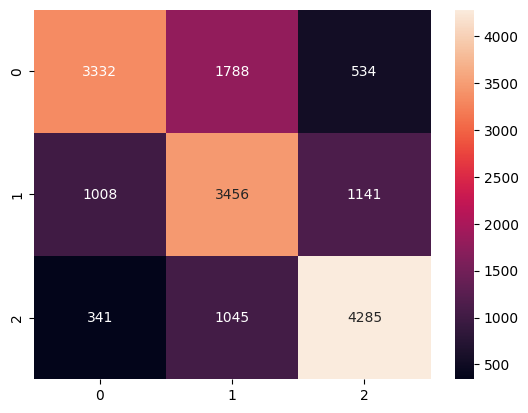

In [28]:
y_pred_classes = np.argmax(y_pred, axis=1)

sns.heatmap(confusion_matrix(y_test,y_pred_classes), annot=True, fmt="d")


In [33]:
current_feedback2=pd.read_csv('/kaggle/input/df1-dataset/current_feedback2.csv')
current2_predicted=model.predict(current_feedback2.drop('Sentiment',axis=1).values)

predicted_class = [np.argmax(lis) for lis in current2_predicted]
current_feedback2['Predicted_Sentiment']=predicted_class

30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step


In [34]:
current_feedback2.shape

(940, 202)

In [40]:

current_feedback2 = current_feedback2.rename(columns={'Sentiment': 'target', 'Predicted_Sentiment': 'prediction'})
reference_data = reference_data.rename(columns={'Sentiment': 'target', 'Predicted_Sentiment': 'prediction'})

current_feedback1 = current_feedback1.rename(columns={'Sentiment': 'target', 'Predicted_Sentiment': 'prediction'})


In [75]:
print(reference_data.columns)
print(current_feedback1.columns)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '192', '193', '194', '195', '196', '197', '198', '199', 'target',
       'prediction'],
      dtype='object', length=202)
Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '192', '193', '194', '195', '196', '197', '198', '199', 'target',
       'prediction'],
      dtype='object', length=202)


In [79]:
reference_data1 = pd.concat([reference_data, current_feedback1], ignore_index=True)


In [80]:

performance_report = Report(metrics=[ClassificationQualityMetric()])
performance_report.run(reference_data=reference_data1, current_data=current_feedback2)
performance_report.save_html("performance_report2.html")

In [83]:
from IPython.core.display import display, HTML
display(HTML("/kaggle/input/df1-dataset/performance_report2.html"))
